# 01_demo_candidates

Author: Melissa Graham

This notebook demonstrates the contents of several publicly available files containing data for the "probably-real" candidates.

Recall:
 * "object" refers to a single detection in a difference image
 * "candidate" refers to associated detections at a given sky location
 * "probably-real" candidates means >10 detections, mean R/B>0.6
   * cuts shown to be reasonable in `extragalactic_fields/source_detection_summary_figures.ipynb`
   * cuts also discussed in Section 3 of Graham et al. (in prep)

In [1]:
# import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

## Read data files

All of the data files have headers explaining when they were created, by which code, and what the columns are.

### Exposures

Information about the exposures obtained for the extragalactic fields, COSMOS and ELAIS.

Columns which are mean values are the average over all subtractions, or in other words all CCDs, of the exposure.

In [2]:
fnm = '../source_detection_summary_files/exposures.dat'
exp_field  = np.loadtxt( fnm, dtype='str',   usecols=(0) )  # field, COSMOS or ELAIS
exp_cal    = np.loadtxt( fnm, dtype='str',   usecols=(1) )  # calendar date
exp_fbs    = np.loadtxt( fnm, dtype='str',   usecols=(2) )  # filename base
exp_id     = np.loadtxt( fnm, dtype='int',   usecols=(3) )  # exposure identifier
exp_mjd    = np.loadtxt( fnm, dtype='float', usecols=(4) )  # modified julian date
exp_filter = np.loadtxt( fnm, dtype='str',   usecols=(5) )  # filter
exp_mlmg   = np.loadtxt( fnm, dtype='float', usecols=(6) )  # mean limiting magnitude (mag)
exp_msee   = np.loadtxt( fnm, dtype='float', usecols=(7) )  # mean seeing (arcsec)
exp_msks   = np.loadtxt( fnm, dtype='float', usecols=(8) )  # mean sky background (counts)
exp_tnobj  = np.loadtxt( fnm, dtype='int',   usecols=(9) )  # number of objects
exp_tnobjg = np.loadtxt( fnm, dtype='int',   usecols=(10) ) # number of objects with R/B score > 0.6 
del fnm

In [3]:
print(len(exp_field))

2268


### Candidates

This file only contains "probably-real" candidates, which had >10 detections and a mean R/B>0.4.

Recall that 'object' means 'detection in a single difference image'.

In [4]:
fnm = '../source_detection_summary_files/candidates.dat'
cand_field    = np.loadtxt( fnm, dtype='str',   usecols=(0) ) # field, COSMOS or ELAIS
cand_id       = np.loadtxt( fnm, dtype='str',   usecols=(1) ) # candidate identifier
cand_ra       = np.loadtxt( fnm, dtype='float', usecols=(2) ) # right ascension (deg)
cand_dec      = np.loadtxt( fnm, dtype='float', usecols=(3) ) # declination (deg)

cand_cobj     = np.loadtxt( fnm, dtype='int',   usecols=(4) ) # number of objects
cand_meanrb   = np.loadtxt( fnm, dtype='float', usecols=(5) ) # mean R/B score of objects
cand_stdrb    = np.loadtxt( fnm, dtype='float', usecols=(6) ) # standard deviation of R/B score of objects
cand_tspan    = np.loadtxt( fnm, dtype='float', usecols=(7) ) # time span between first and last object (days)
cand_amp      = np.loadtxt( fnm, dtype='float', usecols=(8) ) # amplitude between brightest and faintest object (mag)

cand_cobj_g   = np.loadtxt( fnm, dtype='int',   usecols=(9) )
cand_meanrb_g = np.loadtxt( fnm, dtype='float', usecols=(10) )
cand_stdrb_g  = np.loadtxt( fnm, dtype='float', usecols=(11) )
cand_tspan_g  = np.loadtxt( fnm, dtype='float', usecols=(12) )
cand_amp_g    = np.loadtxt( fnm, dtype='float', usecols=(13) )

cand_cobj_r   = np.loadtxt( fnm, dtype='int',   usecols=(14) )
cand_meanrb_r = np.loadtxt( fnm, dtype='float', usecols=(15) )
cand_stdrb_r  = np.loadtxt( fnm, dtype='float', usecols=(16) )
cand_tspan_r  = np.loadtxt( fnm, dtype='float', usecols=(17) )
cand_amp_r    = np.loadtxt( fnm, dtype='float', usecols=(18) )

cand_cobj_i   = np.loadtxt( fnm, dtype='int',   usecols=(19) )
cand_meanrb_i = np.loadtxt( fnm, dtype='float', usecols=(20) )
cand_stdrb_i  = np.loadtxt( fnm, dtype='float', usecols=(21) )
cand_tspan_i  = np.loadtxt( fnm, dtype='float', usecols=(22) )
cand_amp_i    = np.loadtxt( fnm, dtype='float', usecols=(23) )

del fnm

In [5]:
print(len(cand_field))

4384


### Objects

These are objects that are associated with a "probably real" candidate only.

Since this is a deep drilling survey, there can be multiple objects in a given filter in a given night.

In [6]:
fnm = '../source_detection_summary_files/candidate_objects.dat'
obj_field  = np.loadtxt( fnm, dtype='str',   usecols=(0) )  # field, COSMOS or ELAIS
obj_candid = np.loadtxt( fnm, dtype='str',   usecols=(1) )  # candidate identifier
obj_id     = np.loadtxt( fnm, dtype='str',   usecols=(2) )  # object identifier
obj_ra     = np.loadtxt( fnm, dtype='float', usecols=(3) )  # right ascension
obj_dec    = np.loadtxt( fnm, dtype='float', usecols=(4) )  # declination
obj_mjd    = np.loadtxt( fnm, dtype='float', usecols=(5) )  # modified julian date
obj_filter = np.loadtxt( fnm, dtype='str',   usecols=(6) )  # filter
obj_mag    = np.loadtxt( fnm, dtype='float', usecols=(7) )  # apparent magnitude
obj_mage   = np.loadtxt( fnm, dtype='float', usecols=(8) )  # error in apparent magnitude
obj_rb     = np.loadtxt( fnm, dtype='float', usecols=(9) )  # real/bogus score
obj_expid  = np.loadtxt( fnm, dtype='int',   usecols=(10) ) # exposure id
del fnm

In [7]:
print(len(obj_field))

314769


### Nightly-Epoch Lightcurves for Candidates

'Epoch' means 'night'. These are lightcurves for which the photometry for a given night has been combined.

The magnitude error (`mage`) has two components, added in quadrature:
 1. the mean of all objects' magnitude errors
 2. the standard deviation in the objects' magnitudes
 
In this file, every epoch is included, whether or not the candidate was detected in that epoch.

Thus, in some cases the `Nobj`=0, and `mag`, `mage`, and `mrb` are `NaN`, and the limiting magnitude can be used as an upper limit.

In [8]:
fnm = '../candidate_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field  = np.loadtxt( fnm, dtype='str',   usecols=(0) ) # field, COSMOS or ELAIS
candLC_candid = np.loadtxt( fnm, dtype='str',   usecols=(1) ) # candidate identifier
candLC_cal    = np.loadtxt( fnm, dtype='str',   usecols=(2) ) # calendar date of epoch
candLC_mjd    = np.loadtxt( fnm, dtype='float', usecols=(3) ) # modified julian date (mean of all exposures)
candLC_filter = np.loadtxt( fnm, dtype='str',   usecols=(4) ) # filter
candLC_Nobj   = np.loadtxt( fnm, dtype='int',   usecols=(5) ) # number of objects combined 
candLC_mag    = np.loadtxt( fnm, dtype='float', usecols=(6) ) # mean magnitude of all objects combined
candLC_mage   = np.loadtxt( fnm, dtype='float', usecols=(7) ) # magnitude error (see text above)
candLC_mrb    = np.loadtxt( fnm, dtype='float', usecols=(8) ) # mean real bogus score for all objects combined
candLC_maglim = np.loadtxt( fnm, dtype='float', usecols=(9) ) # mean limiting magnitude of all exposures in epoch
del fnm

In [9]:
print(len(candLC_field))

578808


Summary parameters for the nightly-epoch lightcurves.

In [10]:
fnm = '../candidate_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field    = np.loadtxt( fnm, dtype='str',   usecols=(0) ) # field, COSMOS or ELAIS
paramLC_candid   = np.loadtxt( fnm, dtype='str',   usecols=(1) ) # candidate identifier
paramLC_tspan    = np.loadtxt( fnm, dtype='float', usecols=(2) ) # time span in days (first to last epoch)
paramLC_tspan_g  = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r  = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i  = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag   = np.loadtxt( fnm, dtype='float', usecols=(6) ) # brightest magnitude detected
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp      = np.loadtxt( fnm, dtype='float', usecols=(10) ) # amplitude, difference between brightest and faintest epoch detected
paramLC_amp_g    = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r    = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i    = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps     = np.loadtxt( fnm, dtype='int',   usecols=(14) ) # number of epochs detected
paramLC_neps_g   = np.loadtxt( fnm, dtype='int',   usecols=(15) )
paramLC_neps_r   = np.loadtxt( fnm, dtype='int',   usecols=(16) )
paramLC_neps_i   = np.loadtxt( fnm, dtype='int',   usecols=(17) )
del fnm

In [11]:
print(len(paramLC_field))

4384


## Demonstrate How To Use The Data

### For one SN-like candidate, DC21cgfrp

Selected DC21cgfrp as a nice example from the plot in MLG_snia_menagerie.ipynb.

In [12]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','*']
all_fsizes  = [5, 5, 7]

use_candid = 'DC21cgfrp'

ox = np.where( obj_candid == use_candid )[0]
cx = np.where( candLC_candid == use_candid )[0]

#### Use object and nightly-epoch photometry together

Create a lightcurve figure that shows both the object photometry and the nightly-epoch combined photometry.

Use one example candidate.

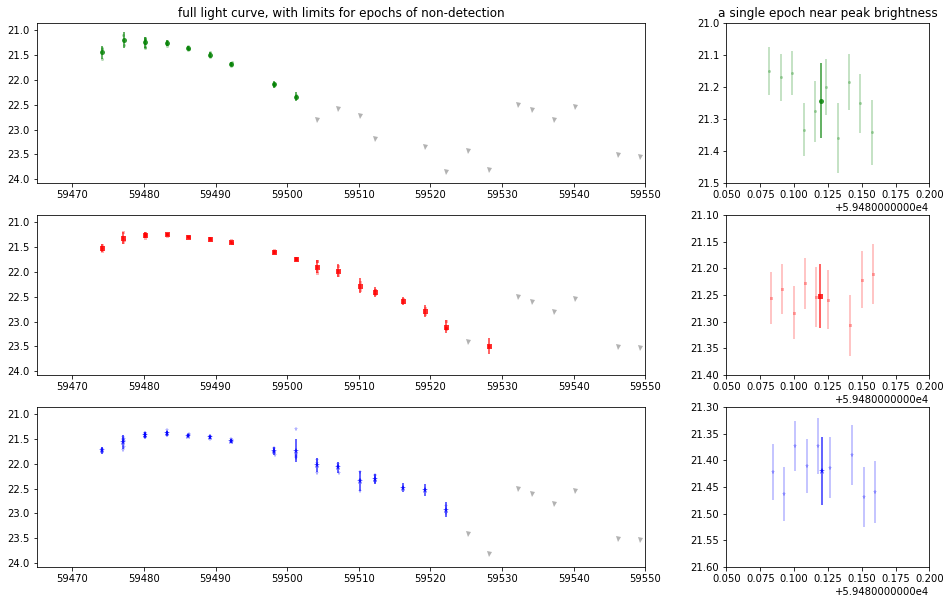

In [13]:
fig, ax = plt.subplots( 3, 2, figsize=(16,10), sharex=False, sharey=False, 
                       gridspec_kw={'width_ratios': [3, 1]} )

### at left, plot the full light curve
for f,filt in enumerate(all_filters):
    ### plot individual objects
    fx = np.where( obj_filter[ox] == filt )[0]
    ax[f,0].plot( obj_mjd[ox[fx]], obj_mag[ox[fx]], 
                  all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.3, mew=0, color=all_fcolors[f] )
    del fx
    ### plot the nightly-epoch combined photometry with error bar
    fx = np.where( candLC_filter[cx] == filt )[0]
    ax[f,0].errorbar( candLC_mjd[cx[fx]], candLC_mag[cx[fx]], yerr=candLC_mage[cx[fx]], 
                      fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f] )
    ### plot limiting magnitudes where there are non-detections
    lx = np.where( np.isnan(candLC_mag[cx[fx]]) == 1 )[0]
    ax[f,0].plot( candLC_mjd[cx[fx[lx]]], candLC_maglim[cx[fx[lx]]], 
                  'v', ms=5, alpha=0.6, mew=0, color='grey' )
    ### flip the y-axis
    ax[f,0].invert_yaxis()
    ### cut out non-detections from previous year
    ax[f,0].set_xlim([59465,59550])

### title
ax[0,0].set_title('full light curve, with limits for epochs of non-detection')

### at right, zoom in on one epoch
for f,filt in enumerate(all_filters):
    ### plot individual objects
    fx = np.where( obj_filter[ox] == filt )[0]
    ax[f,1].errorbar( obj_mjd[ox[fx]], obj_mag[ox[fx]], yerr=obj_mage[ox[fx]], 
                      fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.3, mew=0, color=all_fcolors[f] )
    del fx
    ### plot the nightly-epoch combined photometry with error bar
    fx = np.where( candLC_filter[cx] == filt )[0]
    ax[f,1].errorbar( candLC_mjd[cx[fx]], candLC_mag[cx[fx]], yerr=candLC_mage[cx[fx]], 
                      fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f] )
    ### flip the y-axis
    ax[f,1].invert_yaxis()
    ### zoom in
    ax[f,1].set_xlim([59480.05,59480.2])

### title
ax[0,1].set_title('a single epoch near peak brightness')

### customize zoom-in y-axis limits
ax[0,1].set_ylim([21.5,21.0])
ax[1,1].set_ylim([21.4,21.1])
ax[2,1].set_ylim([21.6,21.3])

plt.show()

#### Use photometry and exposure data together

Investigate why some nightly-epochs have larger magnitude errors.

Plot the nightly-epoch magnitude error as a function of the seeing and sky background of the individual exposures for that epoch.

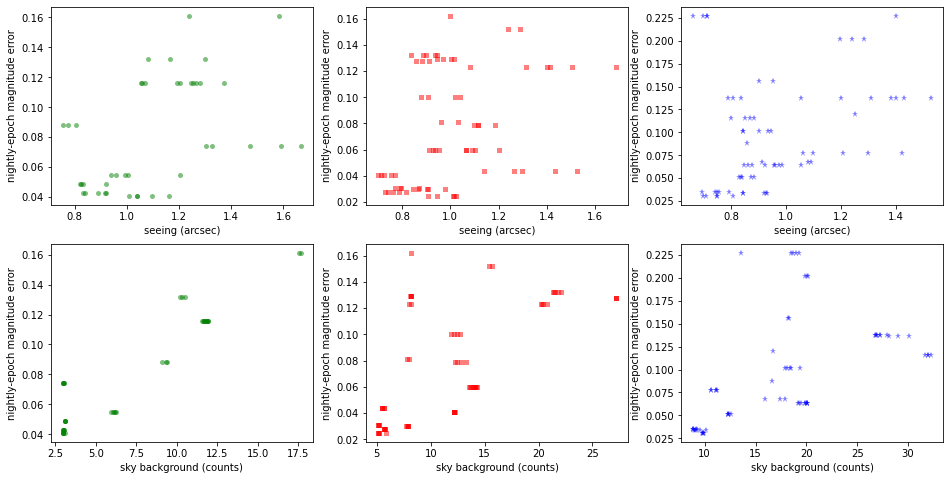

The above shows that epochs with larger magnitude errors had exposures with higher seeing and sky backgrounds


In [14]:
fig, ax = plt.subplots( 2, 3, figsize=(16,8), sharex=False, sharey=False)

for f,filt in enumerate(all_filters):
    fx = np.where( candLC_filter[cx] == filt )[0]
    for x in range(len(fx)):
        yval = candLC_mage[cx[fx[x]]]
        
        ### all the objects which contributed to this epoch, filter, and candidate
        tx = np.where( ( obj_filter[ox] == filt ) & \
                       ( np.abs( obj_mjd[ox] - candLC_mjd[cx[fx[x]]] ) < 0.4 )  )[0]
        for t in range(len(tx)):
            ### match to the exposure
            ex = np.where( exp_id == obj_expid[ox[tx[t]]] )[0]
            xval0 = exp_msee[ex]
            ax[0,f].plot( xval0, yval, all_fshapes[f], ms=all_fsizes[f], alpha=0.5, mew=0, color=all_fcolors[f] )
            xval1 = exp_msks[ex]
            ax[1,f].plot( xval1, yval, all_fshapes[f], ms=all_fsizes[f], alpha=0.5, mew=0, color=all_fcolors[f] )
            del ex, xval0, xval1
        del tx, yval
    del fx
    
    ax[0,f].set_xlabel('seeing (arcsec)')
    ax[1,f].set_xlabel('sky background (counts)')
    ax[0,f].set_ylabel('nightly-epoch magnitude error')
    ax[1,f].set_ylabel('nightly-epoch magnitude error')

plt.show()

print('The above shows that epochs with larger magnitude errors had exposures with higher seeing and sky backgrounds')

In [15]:
del ox,cx

#### Obtain the image triplets for DC21cgfrp

Go to https://decat-webap.lbl.gov/decatview.py/

Under "Candidate Lookup" enter DC21cgfrp.

Or, go straight to https://decat-webap.lbl.gov/decatview.py/showcand?candidate=DC21cgfrp

This actually looks like a variable star, not a SN!

<br>

### For one rapidly evolving candidate, DC21ksmv

This candidate was selected from the `candidate_nightly_epochs.ipynb` plot for short-duration bright evolving phenomena.

#### Look for intra-night evolution in brightness

In [16]:
use_candid = 'DC21ksmv'
mjdzero = 59354
# use_candid = 'DC22eclvq'
# mjdzero = 59590

ox = np.where( obj_candid == use_candid )[0]
cx = np.where( candLC_candid == use_candid )[0]

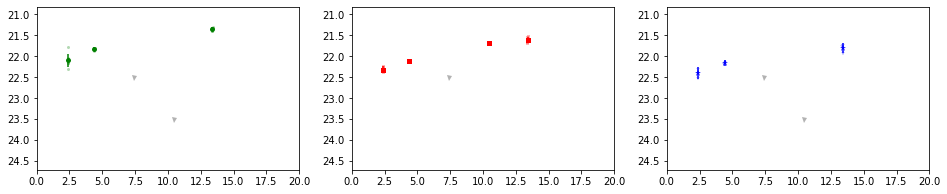

In [17]:
fig, ax = plt.subplots( 1, 3, figsize=(16,3), sharex=True, sharey=False )

for f,filt in enumerate(all_filters):

    fx = np.where( obj_filter[ox] == filt )[0]
    ax[f].plot( obj_mjd[ox[fx]]-mjdzero, obj_mag[ox[fx]], 
                all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.3, mew=0, color=all_fcolors[f] )
    del fx

    fx = np.where( candLC_filter[cx] == filt )[0]
    ax[f].errorbar( candLC_mjd[cx[fx]]-mjdzero, candLC_mag[cx[fx]], yerr=candLC_mage[cx[fx]], 
                    fmt=all_fshapes[f], ms=all_fsizes[f], alpha=1.0, mew=0, color=all_fcolors[f] )

    lx = np.where( np.isnan(candLC_mag[cx[fx]]) == 1 )[0]
    ax[f].plot( candLC_mjd[cx[fx[lx]]]-mjdzero, candLC_maglim[cx[fx[lx]]], 
                'v', ms=5, alpha=0.6, mew=0, color='grey' )

    ax[f].invert_yaxis()

ax[0].set_xlim([0,20])

plt.show()

Zoom in on each unique epoch.

In [18]:
ex = np.where( np.isfinite(candLC_mag[cx]) == 1 )[0]
unique_epochs = np.unique( candLC_cal[cx[ex]] )
print('Unique epochs: ', unique_epochs )
del ex

Unique epochs:  ['210522' '210524' '210530' '210602']


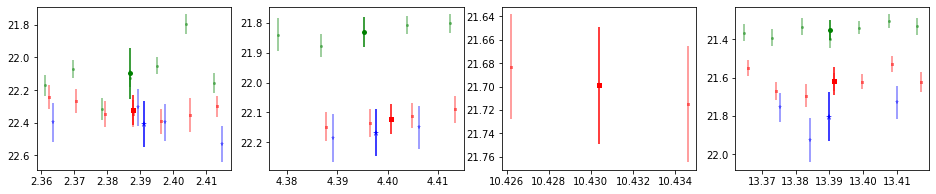

In [19]:
fig, ax = plt.subplots( 1, len(unique_epochs), figsize=(16,3), sharex=False, sharey=False )

for e,epoch in enumerate(unique_epochs):
    for f,filt in enumerate(all_filters):
        tx = np.where( (candLC_cal[cx] == epoch) & 
                       (np.isfinite(candLC_mag[cx])) & 
                       (candLC_filter[cx] == filt) )[0]
        ax[e].errorbar( candLC_mjd[cx[tx]]-mjdzero, candLC_mag[cx[tx]], yerr=candLC_mage[cx[tx]], 
                        fmt=all_fshapes[f], ms=all_fsizes[f], alpha=1.0, mew=0, color=all_fcolors[f] )
        del tx

        tx = np.where( (candLC_cal[cx] == epoch) & 
                       (np.isfinite(candLC_mag[cx])) & 
                       (candLC_filter[cx] == filt) )[0]
        for t in range(len(tx)):
            x = np.where( (np.abs(obj_mjd[ox]-candLC_mjd[cx[tx[t]]]) < 0.4) & 
                          (obj_filter[ox] == filt) )[0]
            ax[e].errorbar( obj_mjd[ox[x]]-mjdzero, obj_mag[ox[x]], yerr=obj_mage[ox[x]], 
                            fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.5, mew=0, color=all_fcolors[f] )
            del x
        del tx
    ax[e].invert_yaxis()

plt.show()

In [20]:
del ox,cx

#### Obtain the image triplets for DC21ksmv

It looks like we can see some very short timescale variability.

This object looks like a nuclear transient.

https://decat-webap.lbl.gov/decatview.py/showcand?candidate=DC21ksmv